In [5]:
#importing liabraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#packages for logistic regression

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [9]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [11]:
df_train = pd.read_csv('train.csv')

In [12]:
df_test = pd.read_csv('test.csv')

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   credit_score      165034 non-null  int64  
 1   country           165034 non-null  object 
 2   gender            165034 non-null  object 
 3   age               165034 non-null  float64
 4   tenure            165034 non-null  int64  
 5   balance           165034 non-null  float64
 6   products_number   165034 non-null  int64  
 7   credit_card       165034 non-null  float64
 8   active_member     165034 non-null  float64
 9   estimated_salary  165034 non-null  float64
 10  churn             165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [15]:
df_train = df_train.drop(['id', 'CustomerId', 'Surname'], axis=1)

In [16]:
df_train.columns = ['credit_score', 'country', 'gender','age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

In [17]:
df_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [18]:
y = df_train['churn'].value_counts(normalize = True)

In [19]:
y

0    0.788401
1    0.211599
Name: churn, dtype: float64

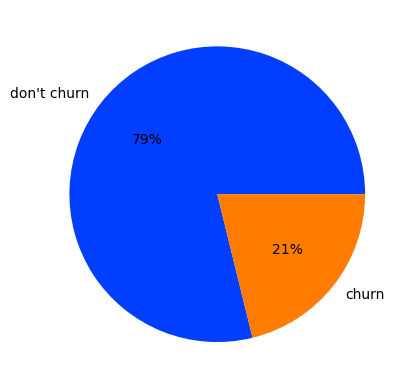

In [21]:
colors = sns.color_palette('bright')[0:5]
labels = ["don't churn", 'churn',]
plt.pie([y[0],y[1]],labels = labels, colors = colors, autopct='%.0f%%') 
plt.show()

In [22]:
df_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x14af6b26830>,
 'caps': [<matplotlib.lines.Line2D at 0x14af6b26d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x14af6b26590>],
 'medians': [<matplotlib.lines.Line2D at 0x14af6b272b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x14af6b27550>],
 'means': []}

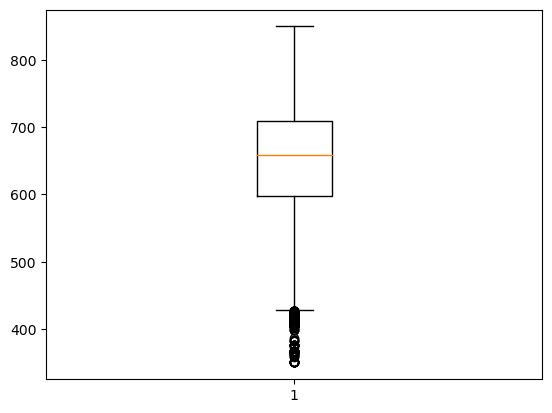

In [24]:
plt.boxplot(df_train['credit_score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14af6cd4df0>,
 'caps': [<matplotlib.lines.Line2D at 0x14af6ca7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x14af6cd4b50>],
 'medians': [<matplotlib.lines.Line2D at 0x14af6cd5750>],
 'fliers': [<matplotlib.lines.Line2D at 0x14af6cd59f0>],
 'means': []}

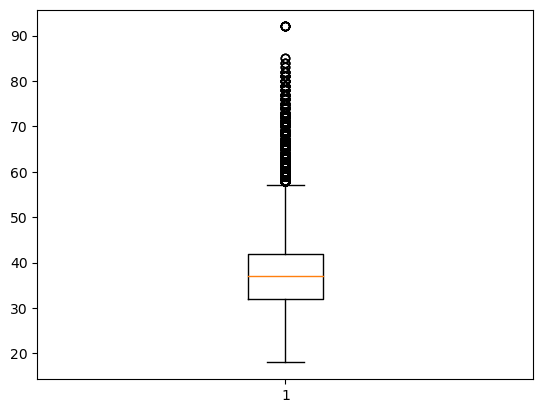

In [25]:
plt.boxplot(df_train['age'])

In [26]:
#impute outliers
for column in ['credit_score', 'age', 'balance']:
    threshold = df_train[column].quantile(0.95)
    df_train.loc[df_train[column] > threshold, column] = threshold
    
df_train.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,654.591139,37.838293,5.020353,54843.726553,1.554455,0.753954,0.497770,112574.822734,0.211599
std,76.366089,8.077647,2.806159,61714.913577,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,787.000000,56.000000,10.000000,151671.550000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [29]:
#encoding categorical variable
df_train['gender2']=np.where(df_train['gender']=='Male',1,0)
df_train[['gender','gender2']].tail()

,gender,gender2
165029,Female,0
165030,Male,1
165031,Male,1
165032,Female,0
165033,Male,1


In [30]:
#convert categorical column country into numeric by one-hot encoding
df_train.country.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [32]:
ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(df_train[["country"]]).toarray()
print(feature_arry)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [33]:
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
print(feature_labels)

['France' 'Germany' 'Spain']


In [34]:
ohe_country = pd.DataFrame(feature_arry, columns = feature_labels)

In [35]:
df_train = pd.concat([df_train,ohe_country], axis = 1)
df_train[['country','France', 'Germany', 'Spain']].head(20)

,country,France,Germany,Spain
0,France,1.0,0.0,0.0
1,France,1.0,0.0,0.0
2,France,1.0,0.0,0.0
3,France,1.0,0.0,0.0
4,Spain,0.0,0.0,1.0
5,Germany,0.0,1.0,0.0
6,France,1.0,0.0,0.0
7,Spain,0.0,0.0,1.0
8,France,1.0,0.0,0.0
9,Germany,0.0,1.0,0.0


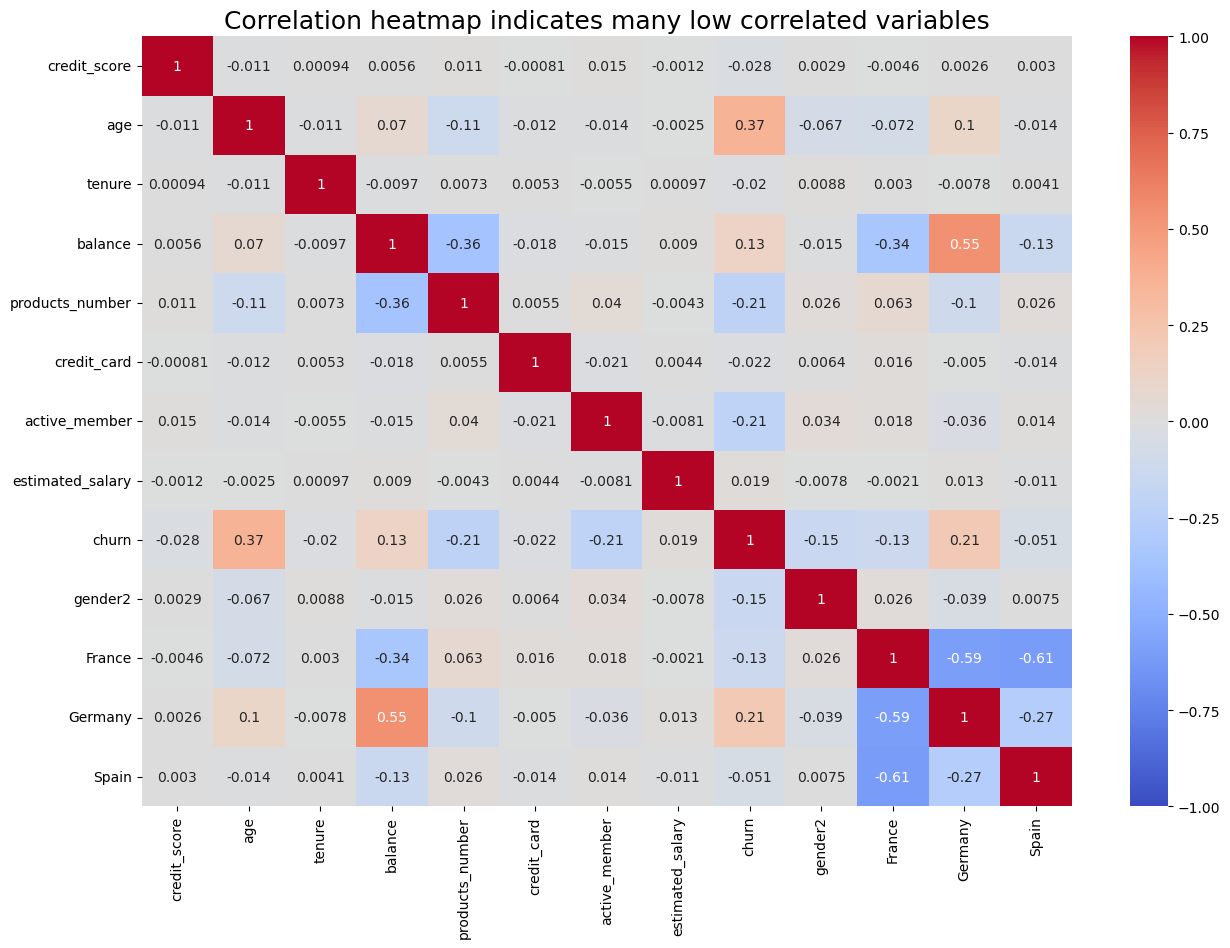

In [36]:
#corelation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(method='pearson', numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();
